In [43]:
# Importing libraries 

import pandas as pd
import numpy as np
import statistics
import time

from cart import *

from cart import binpi_imputation

from cart import adaboost


#from binpi import *


In [44]:
#importing carseat dataset, have split 280 / 120

train = pd.read_csv("Carseats_train.csv")
test = pd.read_csv("Carseats_test.csv")

print(train.shape)

high_train = []

for i in range(train.shape[0]):
    if train["Sales"][i] > 8:
        high_train.append("Yes")
    else:
        high_train.append("No")

train["High"] = high_train
del train["Sales"]
del train["Unnamed: 0"]

high_test = []

for i in range(test.shape[0]):
    if test["Sales"][i] > 8:
        high_test.append("Yes")
    else:
        high_test.append("No")

test["High"] = high_test
del test["Sales"]
del test["Unnamed: 0"]

feature_var = "High"
num_var = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
cat_var = ["ShelveLoc", "Urban", "US", "High"]

train.head()

(280, 12)


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [45]:
train["High"]

print(Counter(train["High"]))
Counter(train["High"]).most_common(1)[0][1]

Counter({'No': 169, 'Yes': 111})


169

In [46]:
train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [47]:
y = train["High"]
print(len(y))
#train.drop(labels = "High", axis = 1, inplace = True)
cat_var = ["ShelveLoc", "Urban", "US"]

280


In [48]:
'''
indici = np.arange(0, len(y))

my_tree = MyNodeClass('n1', indici) 


cart = CART(y,train[num_var],num_var,train[cat_var],cat_var,impurity_fn = "gini",problem="classifier",method = "CART",min_cases_parent= 250,min_cases_child= 5) 

cart.growing_tree(my_tree)
'''


'\nindici = np.arange(0, len(y))\n\nmy_tree = MyNodeClass(\'n1\', indici) \n\n\ncart = CART(y,train[num_var],num_var,train[cat_var],cat_var,impurity_fn = "gini",problem="classifier",method = "CART",min_cases_parent= 250,min_cases_child= 5) \n\ncart.growing_tree(my_tree)\n'

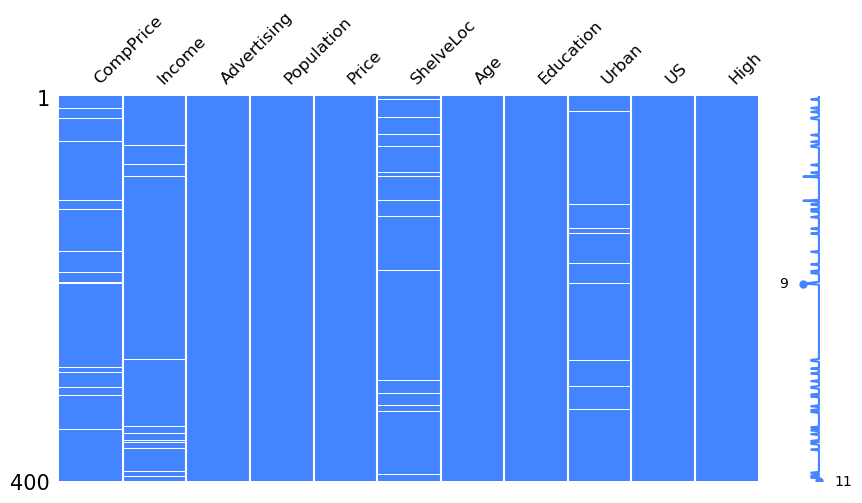

In [49]:
df = pd.concat([train, test], axis = 0)
df.reset_index(drop = True, inplace = True)

df_complete = df.copy()

import random 
missing_values = 50
#10 columns, not the feature variable 
vars = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "Urban", "US"]

vars = ["CompPrice", "Income", "ShelveLoc", "Urban"]


random.seed(42)
var_list = []
row_list = []
for i in range(missing_values):
    var_list.append( random.choice(vars)  )
    row_list.append( random.choice(range(0,400))  )


#impute missing values
for i in range(missing_values):
    df.loc[row_list[i], var_list[i]] = np.nan

import missingno
missingno.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


(400, 11)


,Advertising,Age,Education,High,Population,Price,US,Urban,Income,CompPrice,ShelveLoc
0,11,42,17,Yes,276,120,Yes,Yes,73.0,138.0,Bad
1,16,65,10,Yes,260,83,Yes,Yes,48.0,111.0,Good
2,10,59,12,Yes,269,80,Yes,Yes,35.0,113.0,Medium
4,3,38,13,No,340,128,No,Yes,64.0,141.0,Bad
5,13,78,16,Yes,501,72,Yes,No,113.0,124.0,Bad


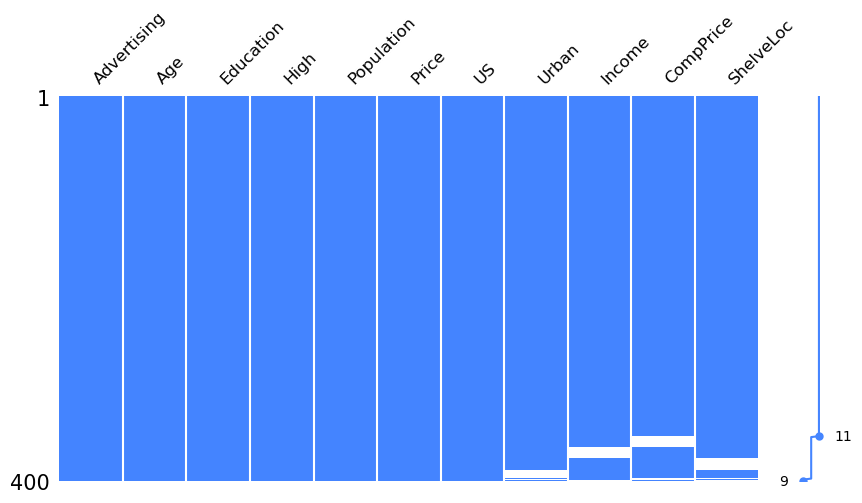

In [50]:
pd.options.mode.chained_assignment = None

id_matrix = id_matrix_creator(df)

df2, column_vect = lexographical_matrix(df, id_matrix)

#dict_match = matches_dict(column_vect)

missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


bin_var = ["Urban", "US", "High"]
class_var = ["ShelveLoc"]

print(df2.shape)
df2.head() 



In [51]:

'''
dict_match = matches_dict(column_vect)
print(" ".join(column_vect[390][2]))
print(dict_match)
dict_match[" ".join(column_vect[390][2])]
dict_match["US High"]
'''

'\ndict_match = matches_dict(column_vect)\nprint(" ".join(column_vect[390][2]))\nprint(dict_match)\ndict_match[" ".join(column_vect[390][2])]\ndict_match["US High"]\n'

In [52]:
df2 = binpi_imputation(df2,column_vect, num_var, bin_var, class_var, weak_learners = 3)

#issue for feature_var as categorical giving multiple splits - not a problem, for greater splits 

Feature Variable:  CompPrice

Iteration 1
feature:  Advertising
i find new_split :  [['Advertising', 24, 5534496.816190476, 0]] start
node_propotion_total  0.01321671532033987
mse 233.58
feature:  Age
i find new_split :  [['Age', 60, 5535006.247120527, 0]] start
node_propotion_total  0.01929598062221699
mse 232.14
feature:  Education
i find new_split :  [['Education', 15, 5533907.803988362, 0]] start
node_propotion_total  0.00618777139199528
mse 235.25
feature:  High
i find new_split :  [['High', 'No', 5533582.82901283, 0]] start
node_propotion_total  0.002309700830924895
mse 236.17
feature:  Population
i find new_split :  [['Population', 477, 5535114.875823677, 0]] start
node_propotion_total  0.0205922951309991
mse 231.83
feature:  Price
i find new_split :  [['Price', 114, 5552967.834886129, 0]] start
node_propotion_total  0.23363957624785195
mse 181.25
feature:  US
i find new_split :  [['US', 'No', 5533459.095788139, 0]] start
node_propotion_total  0.0008331373653391524
mse 236.52
fe

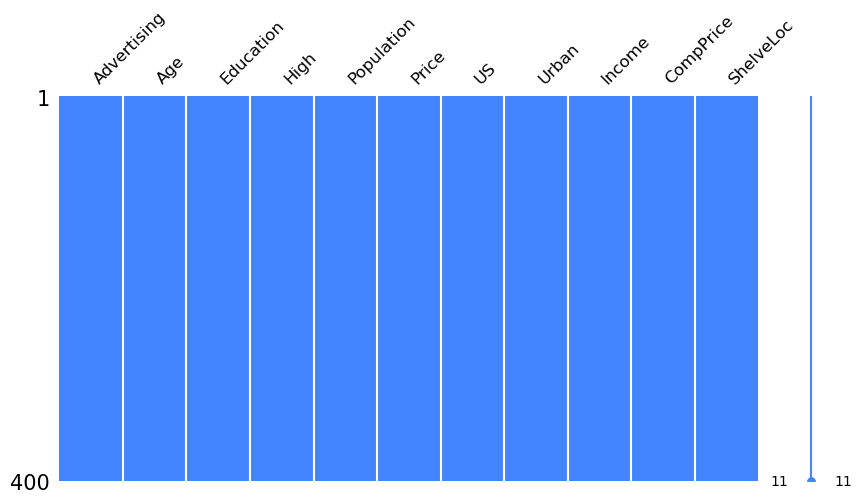

In [53]:
missingno.matrix(df2, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));


In [54]:
df3, column_vect = lexographical_matrix(df, id_matrix)

display(df2.tail(10))
display(df3.tail(10))
df_complete.iloc[[15,12,111,346,71,258,125,13,216,44]]

,Advertising,Age,Education,High,Population,Price,US,Urban,Income,CompPrice,ShelveLoc
112,5,62,12,No,298,125,Yes,Yes,99.000000,116.000000,Good
137,0,80,11,No,436,118,No,No,42.000000,128.000000,Medium
142,0,77,15,No,300,104,No,No,84.000000,124.000000,Medium
174,0,79,15,No,358,185,No,No,24.000000,139.000000,Medium
274,2,34,11,No,67,119,Yes,No,93.000000,135.000000,Medium
301,0,57,16,No,198,87,Yes,No,93.000000,99.000000,Medium
325,11,47,11,Yes,131,104,Yes,Yes,69.000000,144.000000,Medium
108,2,65,16,No,488,103,No,Yes,79.000000,117.505248,Medium
194,18,45,11,No,481,128,Yes,Yes,98.000000,132.036058,Medium
83,7,56,11,No,468,94,Yes,Yes,67.330432,109.000000,Medium


,Advertising,Age,Education,High,Population,Price,US,Urban,Income,CompPrice,ShelveLoc
112,5,62,12,No,298,125,Yes,NaN,99.0,116.0,Good
137,0,80,11,No,436,118,No,NaN,42.0,128.0,Medium
142,0,77,15,No,300,104,No,NaN,84.0,124.0,Medium
174,0,79,15,No,358,185,No,NaN,24.0,139.0,Medium
274,2,34,11,No,67,119,Yes,NaN,93.0,135.0,Medium
301,0,57,16,No,198,87,Yes,NaN,93.0,99.0,Medium
325,11,47,11,Yes,131,104,Yes,NaN,69.0,144.0,Medium
108,2,65,16,No,488,103,No,Yes,79.0,NaN,NaN
194,18,45,11,No,481,128,Yes,NaN,98.0,NaN,Medium
83,7,56,11,No,468,94,Yes,Yes,NaN,109.0,NaN


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
15,149,95,5,400,144,Medium,76,18,No,No,Yes
12,122,35,2,393,136,Medium,62,18,Yes,No,No
111,132,118,12,272,151,Medium,43,14,Yes,Yes,No
346,132,107,0,144,125,Medium,33,13,No,No,Yes
71,148,51,16,148,150,Medium,58,17,No,Yes,No
258,108,38,0,251,81,Bad,72,14,No,No,No
125,89,78,0,181,49,Medium,43,15,No,No,Yes
13,115,28,11,29,86,Good,53,18,Yes,Yes,Yes
216,141,33,0,243,144,Medium,34,17,Yes,No,No
44,85,79,6,325,95,Medium,69,13,Yes,Yes,No
